##Plan of work:
*   Google trends vs Macroeconomics data
*   Amazon bascet vs Inflation





## Loading *data*

Macroeconomics indicators:

*   USA GDP
*   USA GDP PP
*   Unemployment 
*   Inflation
*   USA population

I have to add drop of GDP in the next period! it is intersting thing to predict!


Google trends searches:

*   find job
*   buy a car
*   social payments
*   netflix
*   iphone
*   depression
*   loans
*   doctor
*   fox news
*   children names




















In [1]:
pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#import necessary libraries
import pandas as pd                        
from pytrends.request import TrendReq
pytrends = TrendReq()
import numpy as np
import numpy.linalg as LA

In [6]:
df = pd.DataFrame()

curious_searches = [['find job'], 
                    ['buy a car'], 
                    ['social payments'], 
                    ['netflix'],
                    ['iphone'], 
                    ['depression'], 
                    ['loans'], 
                    ['doctor'], 
                    ['fox news'], 
                    ['children names']]

for search in curious_searches:
  pytrends.build_payload(search, timeframe='all', geo = 'US')
  df[search] = pytrends.interest_over_time()[search]
  


In [7]:
df

,find job,buy a car,social payments,netflix,iphone,depression,loans,doctor,fox news,children names
date,,,,,,,,,,
2004-01-01,97,46,18,5,0,85,13,32,9,52
2004-02-01,90,42,22,5,0,98,14,30,9,46
2004-03-01,98,51,11,5,0,100,15,33,9,52
2004-04-01,93,56,15,5,0,99,15,29,10,31
2004-05-01,94,53,8,5,0,86,15,31,11,63
...,...,...,...,...,...,...,...,...,...,...
2022-10-01,59,84,36,65,39,62,12,69,37,46
2022-11-01,51,79,27,65,39,63,11,63,49,46
2022-12-01,48,84,34,68,42,64,11,58,37,42


In [8]:
import pandas as pd
import io
 
GDP_quater = list(pd.read_csv('GDP.csv')['GDP'])
print(GDP_quater)
GDP_month = np.zeros(230)
for i in range(76*3):
  GDP_month[i] = GDP_quater[i // 3]
df['GDP'] = GDP_month

FileNotFoundError: ignored

In [ ]:
df

,find job,buy a car,social payments,netflix,iphone,depression,loans,doctor,fox news,children names,GDP
date,,,,,,,,,,,
2004-01-01,97,48,15,5,0,82,14,33,9,65,11923.447
2004-02-01,84,42,17,4,0,95,14,31,10,37,11923.447
2004-03-01,94,54,9,5,0,97,15,31,10,53,11923.447
2004-04-01,94,56,11,5,0,100,14,29,10,30,12112.815
2004-05-01,92,55,7,5,0,79,14,29,11,79,12112.815
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,61,89,35,61,37,60,12,64,38,45,26144.956
2022-11-01,56,81,27,62,39,62,11,59,50,46,26144.956
2022-12-01,48,81,34,65,41,62,10,55,41,42,26144.956


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.drop('GDP', axis = 1)
y = df['GDP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

array([[-3.81635266e-01,  2.26856065e+00,  2.00672130e+00,
         6.86647445e-01,  2.65981819e-01,  6.07709515e-01,
        -3.47943744e-01,  1.53471189e+00,  1.76477533e+00,
         6.37355204e-01],
       [ 1.50993061e+00, -9.06843881e-03, -9.94588098e-01,
        -8.51511422e-01, -1.49776170e-01, -1.34911512e+00,
         6.39795801e-01, -8.81802678e-01, -4.17473733e-01,
         1.98374567e+00],
       [ 1.11857216e+00, -1.17708336e+00, -9.94588098e-01,
        -1.60087087e+00, -1.65689888e+00,  1.53953077e+00,
        -3.47943744e-01, -1.48593132e+00, -9.99406816e-01,
         1.11820894e+00],
       [-7.07767315e-01,  1.15894648e+00,  9.47435630e-01,
         8.44407328e-01,  1.62042322e-01,  9.80438017e-01,
        -3.47943744e-01,  1.44840780e+00,  1.40106715e+00,
         3.48842961e-01],
       [ 7.27213698e-01, -1.06028187e+00, -2.05387377e+00,
        -1.56143090e+00, -1.65689888e+00,  2.47135203e+00,
        -2.06838095e-01, -1.48593132e+00, -1.36311499e+00,
         1.

##Plotting data

In [ ]:
X

,find job,buy a car,social payments,netflix,iphone,depression,loans,doctor,fox news,children names
date,,,,,,,,,,
2004-01-01,97,48,15,5,0,82,14,33,9,65
2004-02-01,84,42,17,4,0,95,14,31,10,37
2004-03-01,94,54,9,5,0,97,15,31,10,53
2004-04-01,94,56,11,5,0,100,14,29,10,30
2004-05-01,92,55,7,5,0,79,14,29,11,79
...,...,...,...,...,...,...,...,...,...,...
2022-10-01,61,89,35,61,37,60,12,64,38,45
2022-11-01,56,81,27,62,39,62,11,59,50,46
2022-12-01,48,81,34,65,41,62,10,55,41,42


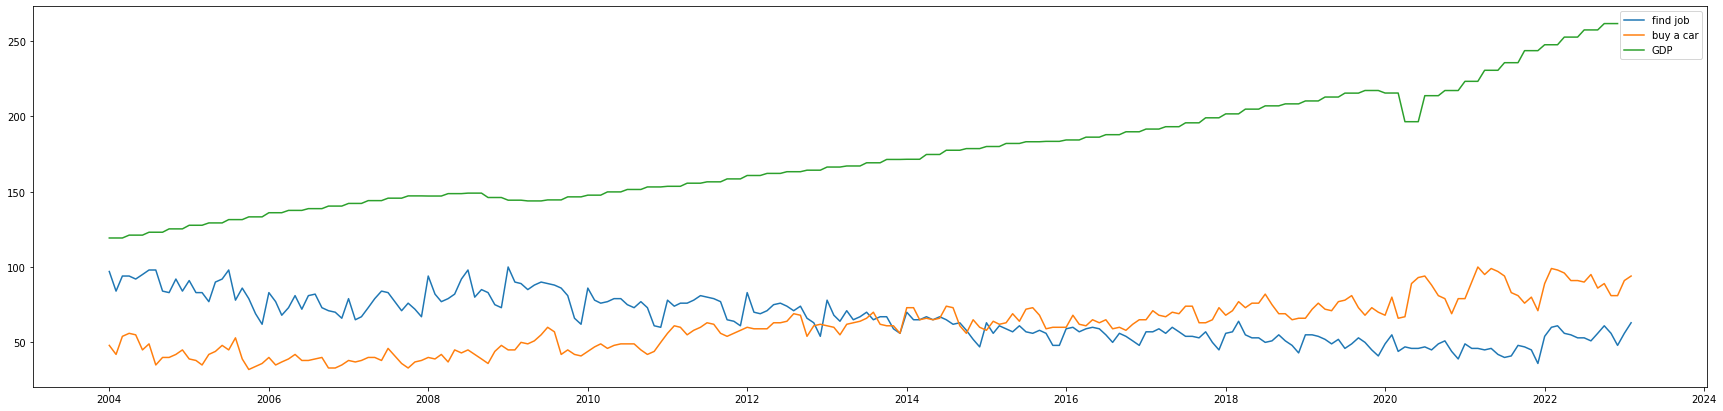

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X['find job'], label = "find job")
plt.plot(X['buy a car'], label = "buy a car")
plt.plot((y/100)[:-2], label = "GDP")
plt.rcParams["figure.figsize"] = (30,7)
plt.legend()
plt.show()

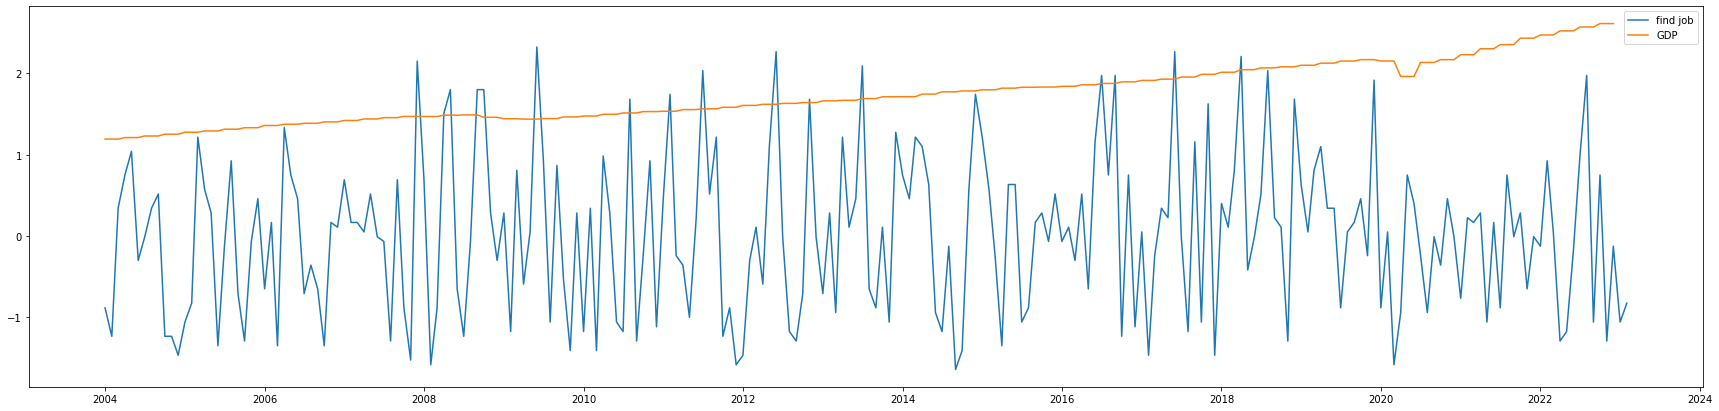

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y.index, np.concatenate((X_train[:,1], X_test[:,1])), label = "find job")
plt.plot((y/10000)[:-2], label = "GDP")
plt.rcParams["figure.figsize"] = (30,7)
plt.legend()
plt.show()

##Training most popular models

Coefficients: 
 [-1754.17200278   539.46399056  -146.16727709  -740.65828592
   197.27410632  -149.33319333   200.53384177  1231.12332667
   517.7209884    -49.15717751]
Mean squared error: 2576670.19
Coefficient of determination: 0.77


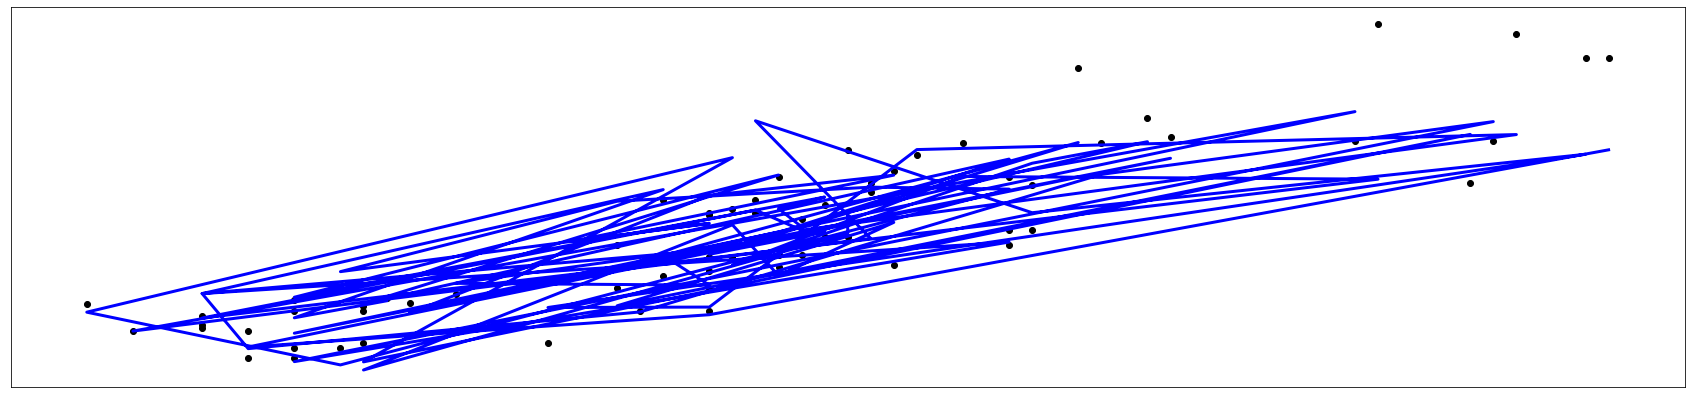

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score


LR = linear_model.LinearRegression()

# Train the model using the training sets
LR.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = LR.predict(X_test)

# The coefficients
print("Coefficients: \n", LR.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test[:,1], y_test, color="black")
plt.plot(X_test[:,1], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()